## Imports and Reading in Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

In [3]:
# loading the training data in.
training_df = pd.read_csv("well_log_train.csv")

In [4]:
# showing 10 samples of the training data.

"""
Features (Predictors) are:

1. CAL: Caliper Log - Records borehole diameter and integrity (changes due to fracturing, 
changes in drill bit size, etc..).
2. CNC: Neutron Porosity.
3. GR: Gamma Ray - detects gamma radiation from the rocks.
4. HRD: High Resolution Deep Induction Log.
5. HRM: High Resolution Medium Induction Log.
6. PE: Photoelectric Factor - Supplements the density log when complex 
mixtures of minerals are present
7. ZDEN: Density.

Target Value:

DTC: Transit Time of a Compressional Wave

"""

display(training_df)

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC
0,14.8824,0.5173,57.1903,1.9826,1.9726,27.9432,2.3510,125.9611
1,14.9570,0.4966,63.1593,2.0472,1.6373,28.1064,2.4055,125.9726
2,14.6341,0.4433,64.5217,2.0464,1.4866,26.5968,2.4579,125.8528
3,14.2318,0.4309,63.0144,2.0054,1.4613,19.5635,2.4219,125.7362
4,14.0163,0.4469,60.8421,1.9533,1.4438,9.8556,2.3138,125.9774
...,...,...,...,...,...,...,...,...
15520,8.6719,0.1879,119.9486,2.5130,2.5187,0.0597,2.6240,74.2133
15521,8.6719,0.1825,122.5286,2.5011,2.4818,0.0582,2.6194,74.3503
15522,8.6797,0.1774,122.0544,2.5010,2.4717,0.0571,2.6169,74.4752
15523,8.6719,0.1744,120.6518,2.5150,2.5007,0.0562,2.6159,74.5917


## EDA on Dataset

Here we perform Exploratory data Analysis, this includes:

- Checking if the dataset has any missing or invalid values.
- Understanding the correlation between the features and the target value.
- Visualizing the variation in the data with depth (Well logs).

In [5]:
training_df.isnull().sum()

CAL     0
CNC     0
GR      0
HRD     0
HRM     0
PE      0
ZDEN    0
DTC     0
dtype: int64

The result above shows that no columns contain missing values, however we also need to check for invalid values, i.e if a column contains 0 but the values must be non-zero.

## Finding Outliers/Noise in the data
We can use sklearn LOF (Local Outlier Factor)

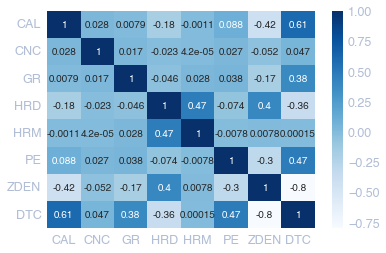

In [6]:
sns.heatmap(training_df.corr(), cbar= True, cmap='Blues', annot=True);

In [7]:
training_df.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC
count,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000
mean,8.488865,0.287303,50.704842,2.541340,6.782635,3.885973,2.409053,88.844722
std,1.861595,3.519687,56.216574,3.597897,485.732765,4.495305,0.185486,23.807132
min,5.930400,0.014500,1.038900,0.123600,0.134100,-0.023200,0.680600,49.970500
25%,6.679000,0.123000,16.504000,0.798300,0.790700,0.050000,2.231900,70.651200
50%,8.578100,0.188900,38.469000,1.861900,1.873800,3.335600,2.470300,79.894700
75%,8.671900,0.333300,62.272000,3.203200,3.341900,7.026700,2.561800,103.490300
max,21.064200,365.885000,1470.253400,206.718200,60467.761700,28.106400,3.259700,155.980300


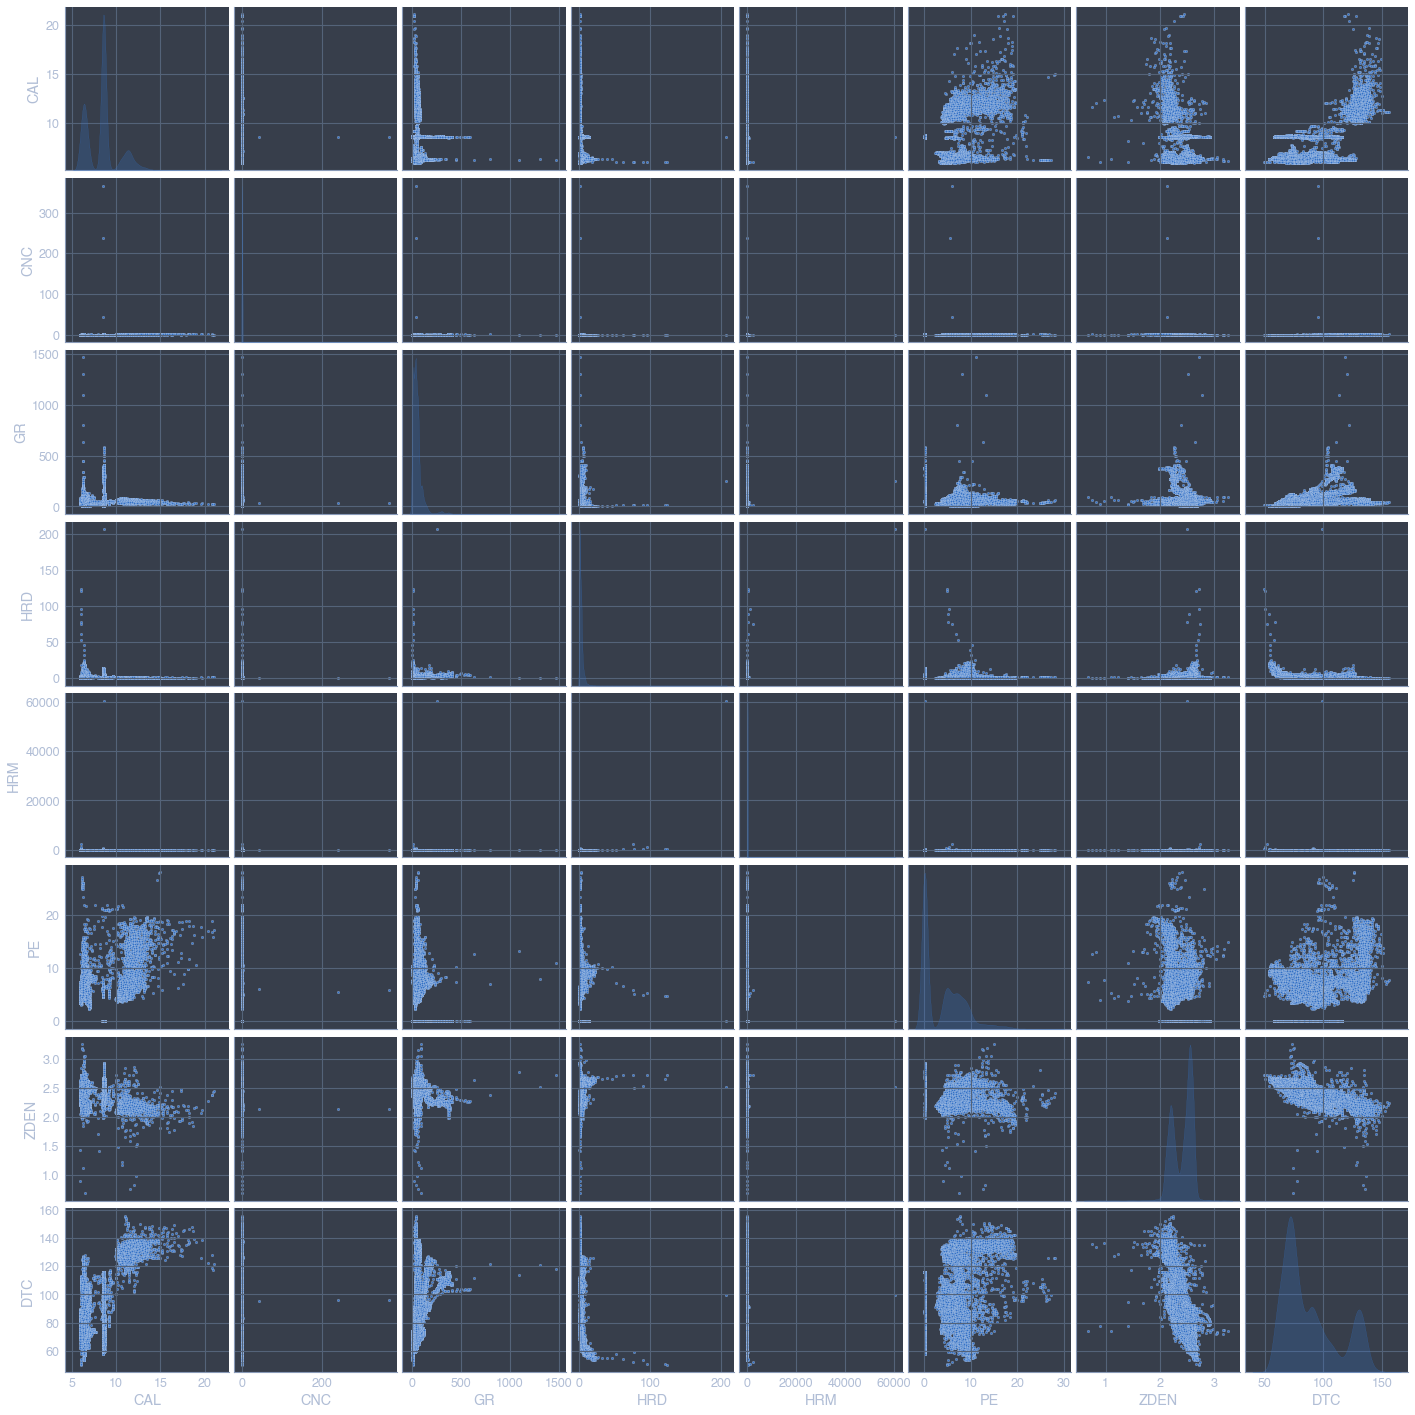

In [8]:
# Visualizing the correlation between features and DTC
sns.pairplot(training_df, diag_kind="kde", plot_kws={"s": 6});

## Creating the Well log chart
This code will be adapted into a function, to allow plotting the chart
given any arbitrary dataframe

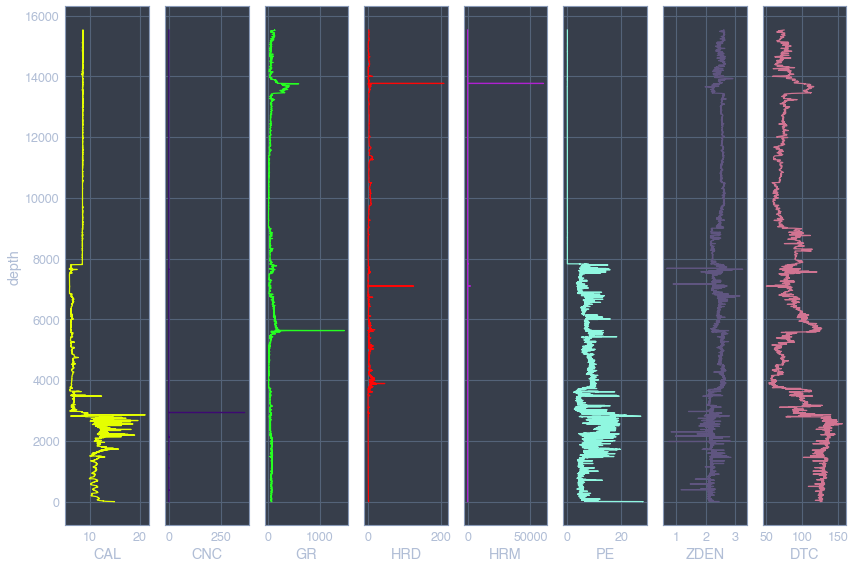

In [9]:
# extracting the maximum depth
max_depth = int(training_df.describe()["CAL"]["count"])

# well logs
params = {
            0: "CAL", 1: "CNC", 2: "GR", 3: "HRD", 4: "HRM",
            5: "PE", 6: "ZDEN", 7: "DTC"
         }
# colors for each plot
colors = ["#e5ff00", "#3d0972", "#26ff21", "#ff0606", "#af21d1",
          "#90f7e0", "#5f5580", "#d17492"]
    
# depth vector --> [1,...,max_depth]
xs = np.linspace(1, max_depth, max_depth)

# The subplots are created with y-axis as 
# depth and x-axes as the desired features/target.

fig, axs = plt.subplots(1, 8, figsize=(12, 8))
    
for param in params.keys():
    axs[param].plot(training_df[params[param]], xs, c=colors[param])
    axs[param].set_xlabel(params[param])
    axs[param].set_ylabel("depth")

# This helps display the y-axis on the outer edge.
for ans in axs:
    ans.label_outer()

fig.tight_layout()
    
plt.show();

## Data formatting, Train-Test split and feature scaling

In [10]:
# formatting the data, to feed into any model.
# we convert the data frame into numpy arrays

X = training_df.iloc[:, :-1].values
y = training_df.iloc[:, -1].values

# splitting our data into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=36)


# feature scaling implementation.

sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

y_train_sc = sc_y.fit_transform(y_train.reshape(len(y_train), 1)).flatten()

## Initial Regression Model
an 80% solution of baseline model is established, and this can be improved upon

### Model Evaluation
we evalaute all models we create using this function bellow.

In [35]:
"""
A function, which helps evaluate a model based on metrics 
such (Root)/Mean Squared Error. It also creates a visualization dispersion of 
the predictions relative to ground truth.

trained_model: Generic trained model object.
X_test: a generic test dataset.
y_ground_truth: actual DTC values corresponding to the test set.
f_scale: an optional boolean flag, to handle feature scaling.
"""
def eval_model(trained_model, X_test, y_ground_truth, f_scale=False):
    
    predictions = trained_model.predict(X_test)
    
    if f_scale:
        predictions = sc_y.inverse_transform(predictions.reshape(len(y_ground_truth), 
                                                                 1)).flatten()
    errors = abs((predictions - y_ground_truth))
    
    MSE = (errors.sum())/len(predictions)
    
    # Mean Absolute Percentage Error
    
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)

    plt.figure(figsize=(6,6))
    
    xs = np.linspace(1, len(y_ground_truth), len(y_ground_truth))
    
    sns.scatterplot(x=xs,y=predictions, label="predictions", s=7)
    sns.scatterplot(x=xs,y=y_ground_truth, label="true values", s=7)
    
    plt.legend();
    
    
    print(f'MSE = {MSE: .2f}')
    print('Mean Absolute percentage error:', round(accuracy, 2), '%.')

## Does feature scaling help ?

MSE = 1480.2466913820658
RMSE = 38.473974208314715
MSE = 1480.246691381655
RMSE = 38.47397420830937


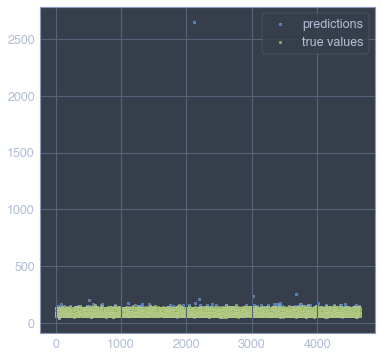

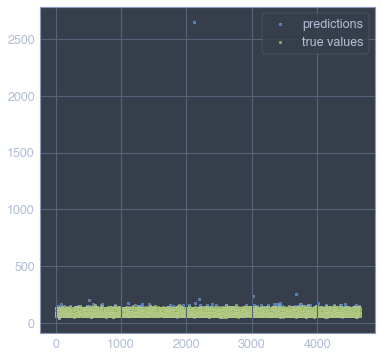

In [12]:
reg_1 = LinearRegression()

reg_2 = LinearRegression()

reg_1.fit(X_train, y_train)

reg_2.fit(X_train_sc, y_train_sc)

eval_model(reg_1, X_test, y_test)

eval_model(reg_2, X_test_sc, y_test, f_scale=True);

## How Important are these features in determining DTC?
Random Forest Regression: we need to perform model hyperparameter tuning

In [14]:
# Getting the baseline error is a correct step, but in this case, does this make sense?
# We are dealing with data that wildly varies and is based on lithology,... 
# So does all of this mean anything?

featured_df = training_df.drop('DTC', axis=1)
featured_df_list = list(featured_df.columns)
for feature in featured_df.columns:
    baseline_preds = X_test[:, featured_df_list.index(feature)]
    baseline_errors = abs(baseline_preds - y_test)
    print(f'Average baseline error of : {feature}', round(np.mean(baseline_errors), 2))

Average baseline error of : CAL 80.66
Average baseline error of : CNC 88.95
Average baseline error of : GR 53.64
Average baseline error of : HRD 86.64
Average baseline error of : HRM 99.99
Average baseline error of : PE 85.24
Average baseline error of : ZDEN 86.76


In [32]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 36);
rf_2 = RandomForestRegressor(n_estimators = 1000, random_state = 36);
rf.fit(X_train, y_train);
rf_2.fit(X_train_sc, y_train_sc);

MSE =  1.56
Mean Absolute percentage error: 98.24 %.
MSE =  1.56
Mean Absolute percentage error: 98.25 %.


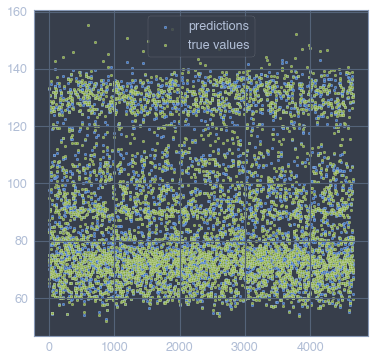

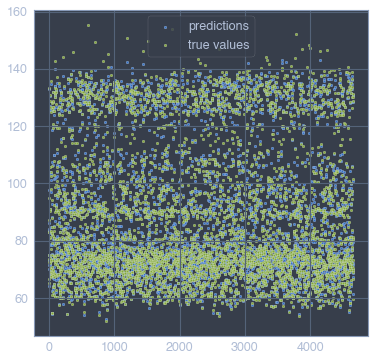

In [36]:
eval_model(rf, X_test, y_test)
eval_model(rf_2, X_test_sc, y_test, f_scale=True);

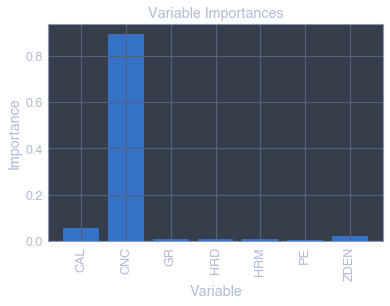

In [34]:
%matplotlib inline
importances = list(rf.feature_importances_)
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, featured_df_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');